In [ ]:
#Dieser Code führt Berechnungen hinsichtlich des ersten/letzten Tages der Regenzeit, MJO, Starkregenereignissen und vielem mehr durch

In [9]:
#Bibliotheken
import pandas as pd
import numpy as np
import xarray as xr
import time
import math
import matplotlib.pyplot as plt
from Formeln import durschn     #Selbstgeschriebene Bibliothek, alle anderen sind im Internet verfügbar
import pymannkendall as mk

In [10]:
#Grunddaten hinsichtlich der täglichen Temperatur/Niederschlag der Länder und der pro Tag zugeordneten Clusternummer
dat=pd.read_csv('/Users/weber-j/Documents/Masterarbeit/Daten/Regendaten nach Ländern.csv',sep=';')
Länder=['Burundi','Dschibuti','Eritrea','Ethiopia','Kenia','Ruanda','Somalia','Tansania','SouthSudan','Sudan','Uganda',
        'Indischer_Ozean','Alles']
Länder_t2m=['t2m_Burundi','t2m_Dschibuti','t2m_Eritrea','t2m_Ethiopia','t2m_Kenia','t2m_Ruanda','t2m_Somalia','t2m_Tanzania',
            't2m_South_Sudan','t2m_Sudan','t2m_Uganda','t2m_Indian_Ocean','t2m_Alles']

In [89]:
dat

,Jahr,Monat,Tag,Burundi,Dschibuti,Eritrea,Ethiopia,Kenia,Ruanda,Somalia,...,t2m_Ethiopia,t2m_Kenia,t2m_Ruanda,t2m_Somalia,t2m_Tanzania,t2m_South_Sudan,t2m_Sudan,t2m_Uganda,t2m_Indian_Ocean,t2m_Alles
0,1980,3,1,10.785186,0.017572,0.172798,0.417602,1.077609,12.056084,0.014717,...,25.23,26.92,21.51,27.10,22.57,32.12,31.38,25.48,26.53,26.85
1,1980,3,2,3.035854,0.263972,1.406225,0.784701,5.090454,6.626391,0.044360,...,25.24,27.26,20.23,26.93,22.03,29.83,27.29,23.23,26.78,27.02
2,1980,3,3,27.079932,0.572069,0.481422,1.221076,4.459785,6.813838,0.094090,...,24.35,26.34,20.11,26.69,22.10,27.81,23.45,21.74,26.81,27.40
3,1980,3,4,8.118551,0.065785,0.139238,1.190425,2.535736,5.517937,0.176683,...,23.43,26.64,20.94,26.68,22.35,28.19,22.95,23.48,26.94,27.40
4,1980,3,5,7.815359,0.747498,0.070884,1.378944,1.007856,4.577410,0.136944,...,23.58,26.53,20.43,26.68,22.52,28.00,23.41,23.91,26.95,27.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,2018,5,27,0.305884,0.017144,0.197418,3.832426,0.826917,0.445556,0.183670,...,23.08,24.56,20.40,27.07,22.09,26.96,30.32,22.45,27.14,28.16
3584,2018,5,28,0.013072,0.002502,0.631972,3.792238,1.464374,0.016482,0.066838,...,24.01,24.73,20.95,27.50,22.09,27.74,30.54,22.58,27.14,28.20
3585,2018,5,29,0.000000,0.000091,0.138334,5.021375,1.423780,0.000000,0.136381,...,23.12,24.67,21.33,27.41,21.92,27.09,28.86,23.14,27.20,27.99
3586,2018,5,30,0.000000,0.000000,0.332736,5.541884,0.587610,0.000000,0.461929,...,23.16,24.68,20.33,27.79,20.99,26.71,28.39,23.21,27.02,28.08


In [11]:
#Berechnung des Einsetzens der Regenzeit, Definition: 7 Tage in Folge landesweit über 1 mm/Tag Niederschlag
lii=[]
for Land in range (0,1):
    print('Land:',Länder[Land])
    li=[]
    for Jahr in range (0,39):
        Tag=0
        while Tag < (92-7):
            if getattr(dat,Länder[Land])[Jahr*92+Tag]>1 and getattr(dat,Länder[Land])[Jahr*92+Tag+1]>1 and getattr(dat,Länder[Land])
            [Jahr*92+Tag+2]>1 and getattr(dat,Länder[Land])[Jahr*92+Tag+3]>1 and getattr(dat,Länder[Land])[Jahr*92+Tag+4]>1 and 
            getattr(dat,Länder[Land])[Jahr*92+Tag+5]>1 and getattr(dat,Länder[Land])[Jahr*92+Tag+6]>1:
                print(dat.Jahr[Jahr*92+Tag],dat.Monat[Jahr*92+Tag],dat.Tag[Jahr*92+Tag])
                #print(Tag)
                li.append(Tag)
                Tag=100
            Tag=Tag+1
            if Tag == 85:
                print('später')
                li.append('nan')
    lii.append(li)

Land: Burundi
1980 3 1
1981 3 1
1982 3 1
1983 3 1
1984 3 1
1985 3 1
1986 3 1
1987 3 5
1988 3 1
1989 3 4
1990 3 1
1991 3 1
1992 3 1
1993 3 4
1994 3 1
1995 3 1
1996 3 8
1997 3 11
1998 3 1
1999 3 1
2000 3 1
2001 3 5
2002 3 1
2003 3 7
2004 3 1
2005 3 1
2006 3 3
2007 3 8
2008 3 1
2009 3 28
2010 3 1
2011 3 13
2012 3 1
2013 3 3
2014 3 5
2015 3 21
2016 3 7
2017 3 6
2018 3 1


In [16]:
#Berechnung des Endes der Regenzeit
for Land in range (0,1):
    print('Land:',Länder[Land],'        ############')
    for Jahr in range (0,39):
        Tag=lii[Land][Jahr]
        if Tag == 'nan':
            print('keine Regenzeit')
        else:
            while Tag < (92-7):
                if getattr(dat,Länder[Land])[Jahr*92+Tag]<1 and getattr(dat,Länder[Land])[Jahr*92+Tag+1]<1 and 
                getattr(dat,Länder[Land])[Jahr*92+Tag+2]<1 and getattr(dat,Länder[Land])[Jahr*92+Tag+3]<1 and 
                getattr(dat,Länder[Land])[Jahr*92+Tag+4]<1 and getattr(dat,Länder[Land])[Jahr*92+Tag+5]<1 and 
                getattr(dat,Länder[Land])[Jahr*92+Tag+6]<1:
                    #print(dat.Jahr[Jahr*92+Tag],dat.Monat[Jahr*92+Tag],dat.Tag[Jahr*92+Tag])
                    print(Tag)
                    Tag=100
                Tag=Tag+1
                if Tag == 85:
                    print('später')

Land: Burundi         ############
später
81
später
später
75
80
später
später
83
81
78
später
8
84
78
später
66
84
75
65
64
69
76
später
64
50
später
später
62
75
später
83
später
72
75
77
68
80
78


In [ ]:
#Übergänge von einem Cluster in den nächsten
for Jahr in range (0,39):
    for Tag in range (0,91):    #Damit nicht jahresübergreifend analysiert wird nur bis 91
        i=Jahr*92+Tag
        if dat.wr900_Cluster[i]==dat.wr900_Cluster[i+1]:
            a=1
        else:
            print(dat.wr900_Cluster[i],dat.wr900_Cluster[i+1])

In [ ]:
#Durchschnittliche Dauer eines Clusters
li=[]
lis=[]
liste=[]
Var='wr900'  #u10, v10, tp, SST
for Cl in range (1,10):
    cnt=0
    count=1
    for Jahr in range (0,39):
        for Tag in range (0,91):  #Damit nicht jahresübergreifend analysiert wird
            i=Jahr*92+Tag
            if eval('dat.'+Var+'_Cluster')[i] == Cl:
                cnt=cnt+1
            if eval('dat.'+Var+'_Cluster')[i] == Cl and eval('dat.'+Var+'_Cluster')[i+1] == Cl:
                count=count+1
            if eval('dat.'+Var+'_Cluster')[i] == Cl and eval('dat.'+Var+'_Cluster')[i+1] != Cl:
                lis.append(count)
                count=1
            if Tag == 90 and count > 1:
                lis.append(count)
                count=1
            
    li.append(cnt)
    liste.append(lis)
    lis=[]
print("It's been ended")

In [ ]:
for Cl in range (0,9):
    print(np.mean(liste[Cl]))

In [ ]:
for i in range (0,3588):
    if dat.SST_Cluster[i]==5:
        print(i/92-int(i/92))

In [86]:
#Berechnung des Mean für jeden Tag, gemittelt über Jahre
leela=[]
lila=[]
for Land in range (0,13):
    print('Land:',Länder[Land])
    for Monat in range (3,6):
        for Tag in range (1,32):
            gd=0
            if Monat == 4 and Tag == 31:
                al=1
            else:
                for i in range (0,3588):
                    if dat.Monat[i]==Monat and dat.Tag[i]==Tag:
                        gd=gd+getattr(dat,Länder[Land])[i]
                gd=gd/39
                lila.append(gd)
    leela.append(lila)
    lila=[]
print('Hard stop')

Land: Burundi
Land: Dschibuti
Land: Eritrea
Land: Ethiopia
Land: Kenia
Land: Ruanda
Land: Somalia
Land: Tansania
Land: SouthSudan
Land: Sudan
Land: Uganda
Land: Indischer_Ozean
Land: Alles
Hard stop


In [287]:
mtp=xr.open_dataset('/Users/weber-j/Documents/Mean_tp.nc')

In [288]:
mtp.tp[0:100]

<xarray.DataArray 'tp' (lat: 100, lon: 88)>
array([[0.075537, 0.0885  , 0.093442, ..., 0.156281, 0.172264, 0.170934],
       [0.102329, 0.112614, 0.110192, ..., 0.167068, 0.168458, 0.162757],
       [0.125058, 0.128418, 0.126068, ..., 0.147204, 0.144207, 0.151669],
       ...,
       [3.415097, 3.112639, 3.10865 , ..., 4.608122, 4.655571, 4.671863],
       [3.190342, 3.152987, 3.429122, ..., 4.655043, 4.674325, 4.709889],
       [2.964278, 3.067967, 3.033966, ..., 4.820133, 4.819159, 4.807168]])
Coordinates:
  * lat      (lat) float64 14.25 14.0 13.75 13.5 ... -9.75 -10.0 -10.25 -10.5
  * lon      (lon) float64 30.0 30.25 30.5 30.75 31.0 ... 51.0 51.25 51.5 51.75
Attributes:
    long_name:  Mean precipitation

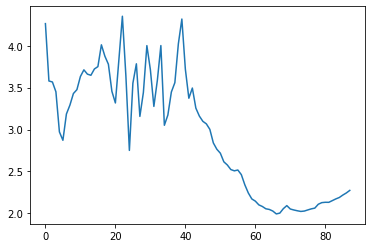

In [289]:
#Mittlerer Niederschlag pro Längengrad
asd=[]
for i in range (0,88):
    asd.append(np.mean(mtp.tp[0:100,i]))
plt.plot(asd)

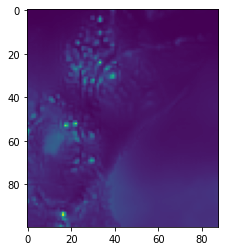

In [123]:
plt.imshow(mtp.tp)

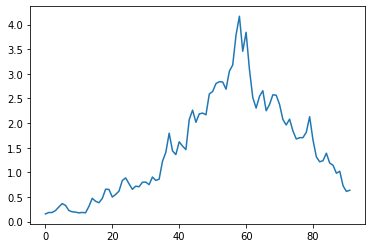

In [99]:
#Mittlerer Niederschlag pro Breitengrad
plt.plot(leela[6])

In [80]:
#Berechnung des Daily Wetness-Index (DWI) pro Land und Cluster
for Land in range (0,13):
    print('Land:',Länder[Land])
    for Cl in range (1,10):
        gd=0
        gf=0
        for Monat in range (3,6):
            for Tag in range (1,32):
                if Monat == 4 and Tag == 31:
                    al=1
                else:
                    for i in range (0,3588):
                        if dat.Monat[i]==Monat and dat.Tag[i]==Tag and dat.wr900_Cluster[i]==Cl:
                            gd=gd+getattr(dat,Länder[Land])[i]
                            gf=gf+leela[Land][int(np.round((i/92-int(i/92))*92,0))]
        print(gf/gd)
print('Schluss')

Land: Burundi
3.3125356479849333
3.930064543532037
3.464573582913958
2.880008704722516
4.042997414986226
13.142150945803497


KeyboardInterrupt: 

In [21]:
#Berechnung der Temperatur pro Datum für den DTI
leela=[]
lila=[]
for Land in range (0,13):
    print('Land:',Länder[Land])
    for Monat in range (3,6):
        for Tag in range (1,32):
            gd=0
            if Monat == 4 and Tag == 31:
                al=1
            else:
                for i in range (0,3588):
                    if dat.Monat[i]==Monat and dat.Tag[i]==Tag:
                        gd=gd+getattr(dat,Länder_t2m[Land])[i]
                gd=gd/39
                lila.append(gd)
    leela.append(lila)
    lila=[]

Land: Burundi
Land: Dschibuti
Land: Eritrea
Land: Äthiopien
Land: Kenia
Land: Ruanda
Land: Somalia
Land: Tansania
Land: Südsudan
Land: Sudan
Land: Uganda
Land: Indischer_Ozean
Land: Alles


In [26]:
#Berechnung des Daily Temperature-Index (DTI) pro Land und Cluster (quasi Daily Wetness-Index, nur für t2m)
for Land in range (12,13):
    print('Land:',Länder[Land])
    for Cl in range (1,12):
        gd=0
        gf=0
        for Monat in range (3,6):
            for Tag in range (1,32):
                if Monat == 4 and Tag == 31:
                    al=1
                else:
                    for i in range (0,3588):
                        if dat.Monat[i]==Monat and dat.Tag[i]==Tag and dat.wr900_Cluster[i]==Cl:
                            gd=gd+getattr(dat,Länder_t2m[Land])[i]
                            gf=gf+leela[Land][int(np.round((i/92-int(i/92))*92,0))]
        print(gf/gd)
print('Schluss')

Land: Alles
1.0027404871782546
0.999343054990148
1.0023775051692294
0.9969471360397619
0.9987224215441132
0.9976900831621504
1.0016373211004566
0.9983344096663727
1.001030147109452


ZeroDivisionError: division by zero

In [ ]:
#Berechnung des ersten Clusters der MAM-Saison
for Jahr in range (0,39):
    print(dat.wr900_Cluster[Jahr*92])

In [ ]:
#Berechnung des letzten Clusters der MAM-Saison
for Jahr in range (0,39):
    print(dat.wr900_Cluster[Jahr*92+91])

In [ ]:
#Auftreten der tp-Cluster 2, 6 und 10 nach Jahr
for Jahr in range (0,39):
    anfang=Jahr*92
    cnt=0
    cou=0
    cout=0
    for i in range (anfang,anfang+92):
        #print(dat.Tag[i])
        if dat.tp_Cluster[i] == 2:
            cnt=cnt+1
        elif dat.tp_Cluster[i] == 6:
            cou=cou+1
        elif dat.tp_Cluster[i] == 10:
            cout=cout+1
    print(cnt,';',cou,';',cout)

In [ ]:
#Berechnung dominante Phase MJO
mjo=pd.read_csv('/Users/weber-j/Documents/MJO.csv',sep=';')

def most_frequent(List):
    count=0
    List=sorted(List)
    num=List[0]
    curr_frequency=List.count(List[0])
    numb=0
    for i in range (1,len(List)):
        if List[i]!=List[i-1]:
            if List.count(List[i])>curr_frequency:
                num=List[i]
                curr_frequency=List.count(List[i])
            elif List.count(List[i])==curr_frequency:
                num=(num,List[i])
    return num

for Jahr in range (1980,2019):
    for Mon in range (1,13):
        la=[]
        for i in range (0,15147):
            if mjo.Jahr[i]==Jahr and mjo.Monat[i]==Mon:
                la.append(mjo.Phase[i])
        print(most_frequent(la))

In [ ]:
mjo.Jahr[i]

In [ ]:
#Niederschlag des Gebietes auf Pixelbasis pro Cluster
gdf=xr.open_dataset('/Users/weber-j/Documents/tp_all.nc')
if len(gdf.time) < 15000 and len(gdf.time) > 14900:   #Regendaten sind kaputt (1979 doppelt drin), geht nur so
    gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))

Prec=[]
for Cl in range (1,10):
    count=0
    for i in range (0,len(dat.Tag)):
        if dat.wr900_Cluster[i]==Cl:
            count=count+1
            Jahr=dat.Jahr[i]-1980
            t=Jahr*365+60
            sch=int((Jahr)/4)
            anfang=t+sch
            if dat.Monat[i] == 4:
                t=t+31
            elif dat.Monat[i] == 5:
                t=t+61
            t=t+dat.Tag[i]-1
            if count==1:
                gg=gdf.tp[t]
            else:
                gg=gg+gdf.tp[t]
    gg=gg/count
    Prec.append(np.asarray(gg))
Prec

In [ ]:
#Durchschn. Niederschlag des Gebietes auf Pixelbasis
gdf=xr.open_dataset('/Users/weber-j/Documents/tp_all.nc')
if len(gdf.time) < 15000 and len(gdf.time) > 14900:   #Regendaten sind kaputt (1979 doppelt drin), geht nur so
    gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))

Grd=[]
for Tag in range (0,92):
    for Jahr in range (0,39):
        t=Jahr*365+60
        sch=int((Jahr)/4)   #Schaltjahr
        day=t+sch+Tag
        if Tag == 0:
            gd=gdf.tp[day]
        else:
            gd=gd+gdf.tp[day]
    gd=gd/39
    Grd.append(np.asarray(gd))
print('schluss nun')

In [ ]:
#Niederschlag des Gebietes auf Pixelbasis pro Monat
gdf=xr.open_dataset('/Users/weber-j/Documents/wr900_all.nc')
if len(gdf.time) < 15000 and len(gdf.time) > 14900:   #Regendaten sind kaputt (1979 doppelt drin), geht nur so
    gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))

Prec=[]
for Cl in range (1,12):
    count=0
    for i in range (0,len(dat.Tag)):
        if dat.tp_Cluster[i]==Cl:
            count=count+1
            Jahr=dat.Jahr[i]-1980
            t=Jahr*365+60
            sch=int((Jahr)/4)
            anfang=t+sch
            if dat.Monat[i] == 4:
                t=t+31
            elif dat.Monat[i] == 5:
                t=t+61
            t=t+dat.Tag[i]-1
            if count==1:
                gg=gdf.u[t]
            else:
                gg=gg+gdf.u[t]
    gg=gg/count
    Prec.append(np.asarray(gg))
Prec

In [ ]:
len(Prec[0][0])

In [ ]:
for cl in range (0,11):
    print(np.mean(Prec[cl][0]))

In [ ]:
#Pro Land
Länder=['Burundi','Dschibuti','Eritrea','Ethiopia','Kenia','Ruanda','Somalia','Tansania','SouthSudan','Sudan','Uganda',
        'Indischer_Ozean','Alles']
ged=xr.open_dataset('/Users/weber-j/Documents/Masken/GHA_klein.nc')
for Land in range (0,12):
    print('Land:',Länder[Land])
    for cl in range (0,11):
        wr_l=durschn(Prec[cl][0]*np.asarray(ged.Masken[Land]),ged.Masken[Land])
        print(float(np.sum(wr_l)))

In [78]:
#Ob und wann kommt ein Cluster vor in der MAM-Season (entspricht dem onset date des Clusters)
for cl in range (1,10):
    print('Cluster:',cl)
    for Jahr in range (1980,2019):
        day=0
        while day < 92:
            i=(Jahr-1980)*92+day
            day=day+1
            if Jahr == dat.Jahr[i] and cl == dat.SST_Cluster[i]:
                print(day)
                day=100
            if day == 92:
                print('')

Cluster: 1

13
28
13
69
42
3
7
42
24
21
10
35
44
27
36
46
33
42

59
52
44
45
17
18
18
20
40
79
3
57
44
22
63
22
39
27
36
Cluster: 2
25
12
1
72
63
51
70
47
63
63
75
52
29
68
65
63
44
67
78
55
46
59
72
43
54
54
75
60
57
41
51
61
70
53
58
76
65
55
69
Cluster: 3
41

48
2
11
33
8
24
17
15
31
3
17
20

25
18
13
22
30
19
2
1
21
30
16
2
27
8
8
34
34
20
3
5
15
48
13
3
Cluster: 4
60
64
55
56
52
44
37
65
47
66
67
70
36

51
49

60
50
60


42
57

59
54
46


45
64
56
61
42
24
45
59
38
Cluster: 5
48
42
58
54

41
51
70
50
54
79
85
59
57
62
61
74
35
69
57
58
37
51
51
60
58
34
45

72
54
58
54
57
69
57
60
76
52
Cluster: 6
9
1
3
6
2
5
1
2
1
1
19
1
2
3
1
16
2
1
1
5
2
1
17
1
1
1
10
1
3
2
9
1
2
1
1
1
2
2
8
Cluster: 7
37
33
38
37
27
24
17
25
5
13
6
13
31
39
36
24
17
31
21
16
39
36
20
27
34
14
48
51
31
37
26
47
43
34
36
26
42
25
25
Cluster: 8
21
17
4
1
3

10
1
6
20
11
2
4
15
2
11
1
7
6
1
6
4
8
5
16
6
17
6
1
1
4
3
27
5
8
3
5
11
16
Cluster: 9
1
7
6
15
1
1
5
9
4
5
1
6
1
1
3
1
13

7
7
1
5
2
13
6
2
3
9
13
4
2
5
1
8


In [130]:
#Ob und wann kommt ein Cluster vor in der MAM-Season, letzte Apperance
for cl in range (1,12):
    print('Cluster:',cl)
    for Jahr in range (1980,2019):
        day=0
        Day=0
        for day in range (0,92):
            i=(Jahr-1980)*92+day
            if Jahr == dat.Jahr[i] and cl == dat.tp_Cluster[i]:
                Day=day
        if Day == 0:
            print('')
        else:
            print(Day)

Cluster: 1

54
75
87
74
71
81
35
44
57
57
29
84
82
71
54
78
52
53

65
74
44
54
49
80
64
43
39
78
83
79
56
55
62
88
63
76
59
Cluster: 2
91
91
90
91
91
91
91
91
91
89
91
91
91
91
91
91
91
91
91
91
90
91
89
91
91
91
91
89
91
86
90
91
89
91
90
91
88
91
91
Cluster: 3
60

47
69
32
73
46
42
17
69
65
55
68
76

52
23
46
38
29
23
28
40
55
51
45
67
27
48
68
35
51
79
25
47
20
49
57
72
Cluster: 4
63
66
83
59
53
67
80
81
64
72
66
79
82

60
87

61
63
73


52
85

86
69
91


66
63
82
64
41
72
58
69
73
Cluster: 5
73
76
91
86

85
67
89
80
71
79
84
59
83
76
72
85
58
76
61
71
76
70
75
63
88
77
44

72
84
82
68
69
70
56
71
89
82
Cluster: 6
57
89
62
50
57
17
63
58
90
91
85
50
89
42
46
83
60
87
89
84
91
82
91
87
85
55
80
83
71
91
91
54
91
89
74
81
91
85
29
Cluster: 7
68
72
63
70
56
79
84
78
68
79
73
88
63
69
74
76
56
76
70
74
73
56
68
66
58
90
73
65
54
70
61
68
83
58
73
74
62
71
74
Cluster: 8
35
16
45
32
39

29
44
30
31
45
21
66
39
41
53
49
45
39
32
37
34
28
41
47
49
43
41
44
34
39
53
38
34
36
49
53
41
30
Clus

In [350]:
#Berechnung temp über W-IOD
gdf=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
if len(gdf.time) > 14750 and len(gdf.time) < 15000:
    gdf=gdf.isel(longitude=slice(100,121),time=slice(688,15000),latitude=slice(23,44))
else:
    gdf=gdf.isel(longitude=slice(100,121),time=slice(365,15000),latitude=slice(23,44))
    
lati=[]
for r in range (0,len(gdf.latitude)):
    lati.append(float(gdf.latitude[r]))
Deucor=np.cos(np.deg2rad(lati))*6371*2*math.pi/(np.cos(np.deg2rad(0))*6371*2*math.pi)  #Das wird für die Breitenkorrektur gebraucht

li=[]
lii=[]
for b in range (0,21):
    for a in range (0,21):
        li.append(Deucor[b])
    lii.append(li)
    li=[]
lii=np.asarray(lii)

lili=[]
for Jahr in range (0,39):
    print(Jahr)
    t=Jahr*365+59
    sch=int((Jahr)/4)   #Schaltjahr
    anfang=t+sch
    ende=anfang+31+30+31
    for k in range (anfang,ende):
        if k == anfang:
            gd=gdf.t2m[k]*lii
        else:
            gd=gd+gdf.t2m[k]*lii
    gd=gd/92
    lili.append(gd)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


KeyboardInterrupt: 

In [ ]:
gdf

In [ ]:
#Berechnet pro Land die Temperatur pro Tag, MAM-Season
gdf=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
ged=xr.open_dataset('/Users/weber-j/Documents/Masken/GHA_klein.nc')
liste=['Burundi','Dschibuti','Eritrea','Äthiopien','Kenia','Ruanda','Somalia','Tansania','Südsudan','Sudan','Uganda','Indischer Ozean']
if len(gdf.time) > 14750 and len(gdf.time) < 15000:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(688,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))
    lila=[]
start=time.time()
for ma in range (5,6):
    end=time.time()
    print('Land:',liste[ma],'    Zeit:',end-start)
    lili=[]
    for Jahr in range (0,39):
        print(Jahr)
        t=Jahr*365+59
        sch=int((Jahr)/4)   #Schaltjahr
        anfang=t+sch
        ende=anfang+31+30+31
        for k in range (anfang,ende):
            gdd=durschn(gdf.t2m[k]*ged.Masken[ma],ged.Masken[ma])   #Hier wird die Verengung der Längengrade nach Norden korrigiert
            lili.append(float(gdd))
    lila.append(lili)

In [291]:
#Berechnet die Temperatur/Niederschlag pro Tag, ganzes Jahr, ganze Region
gdf=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
ged=xr.open_dataset('/Users/weber-j/Documents/Masken/GHA_klein.nc')
liste=['Burundi','Dschibuti','Eritrea','Äthiopien','Kenia','Ruanda','Somalia','Tansania','Südsudan','Sudan','Uganda','Indischer Ozean']

if len(gdf.time) > 14750 and len(gdf.time) < 15000:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))
lati=[]
for r in range (0,len(gdf.latitude)):
    lati.append(float(gdf.latitude[r]))
Deucor=np.cos(np.deg2rad(lati))*6371*2*math.pi/(np.cos(np.deg2rad(0))*6371*2*math.pi)  #Das wird für die Breitenkorrektur gebraucht

li=[]
lii=[]
for b in range (0,100):
    for a in range (0,88):
        li.append(Deucor[b])
    lii.append(li)
    li=[]
lii=np.asarray(lii)

start=time.time()
lili=[]
for k in range (0,len(gdf.time)):
    gdd=durschn(gdf.t2m[k]*lii,lii)
    print(float(gdd))

297.83151039527746
297.6280565363735
297.5856954326017
297.6349250203121
297.7237517320956
297.71403675502836
297.7470935315982
297.6557131561378
297.8982935166983
297.9499785746523
298.01739601398543


KeyboardInterrupt: 

In [369]:
lii

array([[0.96923091, 0.96923091, 0.96923091, ..., 0.96923091, 0.96923091,
        0.96923091],
       [0.97029573, 0.97029573, 0.97029573, ..., 0.97029573, 0.97029573,
        0.97029573],
       [0.97134207, 0.97134207, 0.97134207, ..., 0.97134207, 0.97134207,
        0.97134207],
       ...,
       [0.98480775, 0.98480775, 0.98480775, ..., 0.98480775, 0.98480775,
        0.98480775],
       [0.9840407 , 0.9840407 , 0.9840407 , ..., 0.9840407 , 0.9840407 ,
        0.9840407 ],
       [0.98325491, 0.98325491, 0.98325491, ..., 0.98325491, 0.98325491,
        0.98325491]])

In [14]:
#Berechnet pro Land die Temperatur/Niederschlag pro Tag, ganzes Jahr
gdf=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
ged=xr.open_dataset('/Users/weber-j/Documents/Masken/GHA_klein.nc')
liste=['Burundi','Dschibuti','Eritrea','Äthiopien','Kenia','Ruanda','Somalia','Tansania','Südsudan','Sudan','Uganda','Indischer Ozean']

if len(gdf.time) > 14750 and len(gdf.time) < 15000:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))
    lila=[]
start=time.time()
for ma in range (7,9): #(0,12)
    end=time.time()
    print('Land:',liste[ma],'    Zeit:',end-start)
    lili=[]
    for k in range (0,len(gdf.time)):
        gdd=durschn(gdf.t2m[k]*ged.Masken[ma],ged.Masken[ma])
        print(float(gdd)-273.15)

Land: Tansania     Zeit: 0.00015807151794433594
22.176819634708636
22.21705442359132
22.333234092353337
22.372369572916455
22.74526540637862
23.193536263956503


KeyboardInterrupt: 

In [340]:
gdf.time

<xarray.DataArray 'time' (time: 14244)>
array(['1980-01-02T11:30:00.000000000', '1980-01-03T11:30:00.000000000',
       '1980-01-04T11:30:00.000000000', ..., '2018-12-29T11:30:00.000000000',
       '2018-12-30T11:30:00.000000000', '2018-12-31T11:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-02T11:30:00 ... 2018-12-31T11:30:00
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T

In [314]:
gdf

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 100, longitude: 88, time: 14245)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T11:30:00 ... 2018-12-31T11:30:00
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 51.25 51.5 51.75
  * latitude   (latitude) float32 14.25 14.0 13.75 13.5 ... -10.0 -10.25 -10.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    history:      Mon May 17 13:40:09 2021: cdo mergetime /pd/home/weber-j/Zw...
    Conventions:  CF-1.6
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [ ]:
#Durchschnitt der Temperatur pro Jahr, ganze Region
gdf=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
if len(gdf.time) > 14750 and len(gdf.time) < 15000:
    gdf=gdf.isel(longitude=slice(100,121),time=slice(688,15000),latitude=slice(23,44))
else:
    gdf=gdf.isel(longitude=slice(100,121),time=slice(365,15000),latitude=slice(23,44))
lati=[]
for r in range (0,len(gdf.latitude)):
    lati.append(float(gdf.latitude[r]))
Deucor=np.cos(np.deg2rad(lati))*6371*2*math.pi/(np.cos(np.deg2rad(0))*6371*2*math.pi)  #Das wird für die Breitenkorrektur gebraucht

li=[]
lii=[]
for b in range (0,21):
    for a in range (0,21):
        li.append(Deucor[b])
    lii.append(li)
    li=[]
lii=np.asarray(lii)

lili=[]
for Jahr in range (0,39):
    print(Jahr)
    t=Jahr*365+59
    sch=int((Jahr)/4)   #Schaltjahr
    anfang=t+sch
    ende=anfang+31+30+31
    for k in range (anfang,ende):
        gdd=durschn(gdf.t2m[k]*lii,lii)
        lili.append(float(gdd))
for i in range (0,len(lili)):
    print(lili[i]-273.15)

In [ ]:
for Land in range (0,12):
    print('Land:',liste[Land])
    for i in range (0, len(lila[0])):
        print(np.round(lila[Land][i]-273.15,2))

In [ ]:
for i in range (0,12):
    print(np.round(np.percentile(lila[i],95)-273.15,2))

In [ ]:
for Land in range (0,12):
    print('Land',liste[Land])
    for j in range (0,len(lila[0])):
        if lila[Land][j] < np.percentile(lila[Land],5):
            print(dat.tp_Cluster[j],dat.SST_Cluster[j],dat.wr900_Cluster[j])

In [ ]:
#Herausfinden der Maximaltemperatur/-niederschlag und des zugehörigen Clusters
for Land in range (0,12):
    print('Land:',Länder[Land])
    for Jahr in range (1980,2019):
        liss=[]
        for i in range (0,3588):
            if dat.Jahr[i]==Jahr:
                liss.append(getattr(dat,Länder_t2m[Land])[i])
        print(dat.SST_Cluster[liss.index(max(liss))+(Jahr-1980)*92]) 
        #print(np.max(liss),liss.index(max(liss)),dat.SST_Cluster[liss.index(max(liss))+(Jahr-1980)*92])

In [ ]:
#Berechnet für einen bestimmten Pixel die SST pro Tag der Saison, gemittelt über Jahre
gdf=xr.open_dataset('/Users/weber-j/Documents/SST_all.nc')
if len(gdf.time) > 14750 and len(gdf.time) < 15000:
    gdf=gdf.isel(time=slice(688,15000))
else:
    gdf=gdf.isel(time=slice(365,15000))
    lila=[]
start=time.time()

lili=[]
for Jahr in range (0,39):
    #print(Jahr)
    t=Jahr*365+59
    sch=int((Jahr)/4)   #Schaltjahr
    anfang=t+sch
    ende=anfang+31+30+31
    for k in range (anfang,ende):
        gdd=float(gdf.var1[k,50,70])
        lili.append(float(gdd))
Tag=[]
for day in range (0,92):
    Day=0
    for yr in range (0,39):
        Day=Day+lili[yr*92+day]
    Tag.append(Day/39)
Tag

In [ ]:
plt.plot(Tag)

In [ ]:
#Berechnung des Durchschnittlichen Tages pro Cluster
bla=[]
for Cl in range (1,12):
    blaa=[]
    for i in range (0,3588):
        if dat.v10_Cluster[i]==Cl:
            blaa.append(i-(dat.Jahr[i]-1980)*92)
    bla.append(blaa)
for Cl in range(0,11):
    print(np.mean(bla[Cl]))

In [50]:
gdd=xr.open_dataset('/Users/weber-j/Documents/SST_all.nc')
gdd.var1[100,51]

<xarray.DataArray 'var1' (lon: 88)>
array([      nan,       nan, 301.3512 , 301.54822, 302.31604,       nan,
             nan,       nan,       nan,       nan,       nan, 299.60693,
       299.42712, 299.31592,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan, 301.88623,
       302.10693, 302.22986, 302.36682, 302.45264, 302.4928 , 302.51404,
       302.53088, 302.58545, 302.66162, 302.72034, 302.83154, 302.94788,
       303.02478, 303.08923, 303.17615, 303.2749 , 303.34326, 303.38916,
       303.4253 , 303.41736, 303.40295, 303.36963, 303.35803, 303.4037 ,
       303.48096, 303.54443, 303.54846, 303.48193], dtype=float32)
Coordinates:
    time     float64 1.979e+07
  * lon      (lon) float64 30.0 30.25 30.5 30.75 31.0 ... 51.0 51.25 51.5 51.75
    lat      float64 1.5
Attributes:
    table:    255

In [275]:
#Ist der Landwind oder der Seewind wärmer?
gdf=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
gdf2=xr.open_dataset('/Users/weber-j/Documents/SST_all.nc')
if len(gdf.time) < 15000 and len(gdf.time) > 14900:   #Regendaten sind kaputt (1979 doppelt drin), geht nur so
    gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))
gdf1=gdf.isel(longitude=slice(50,60),latitude=slice(43,55))
gdf2=gdf.isel(longitude=slice(62,85),latitude=slice(47,55))
lilis=[]
lilis2=[]
for Jahr in range (0,39):
    #print(Jahr)
    t=Jahr*365+59
    sch=int((Jahr)/4)   #Schaltjahr
    anfang=t+sch
    ende=anfang+31+30+31
    for k in range (anfang,ende):
        gdd=np.asarray(gdf1.t2m[k])
        gdd2=np.asarray(gdf2.t2m[k])
        lilis.append(gdd)
        lilis2.append(gdd2)
Tag=[]
Tag2=[]
for day in range (0,92):
    Day=0
    tach=0
    for yr in range (0,39):
        Day=Day+lilis[yr*92+day]
        tach=tach+lilis2[yr*92+day]
    Tag.append(Day/39)
    Tag2.append(tach/39)

In [276]:
nop=[]
nop2=[]
for track in range (0,92):
    lo=[]
    lo2=[]
    for day in range (0,len(Tag[0])):
        lo.append(Tag[track][day])
    for day in range (0,len(Tag2[0])):
        lo2.append(Tag2[track][day])
    #print(np.nanmean(lo))
    nop.append(np.nanmean(lo))
    nop2.append(np.nanmean(lo2))

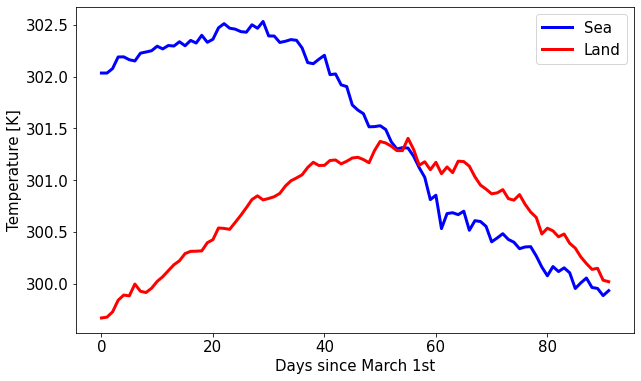

In [278]:
#Vergleich zwischen der Meeres- und der Landestemperatur, Fig. A1
import matplotlib.lines as mlines
fig=plt.figure(figsize=(10,6))
plt.plot(nop,label='Sea',linewidth=3,color='blue') #blau, SST
plt.plot(nop2,label='Land',linewidth=3,color='red')  #orange, t2m
#x-Achse Tage
plt.xlabel('Days since March 1st',size=15)
plt.ylabel('Temperature [K]',size=15)
plt.yticks(size=15)
plt.xticks(size=15)
plt.legend(fontsize=15)

In [147]:
#Anzahl der Dürretage pro Land und Jahr
for Land in range (0,13):
    print(liste[Land])
    for yr in range (0,39):
        cnt=0
        for i in range (0,92):
            if getattr(dat,liste[Land])[yr*92+i] < 0.2:
                cnt=cnt+1
        print(cnt)

Burundi
3
5
1
6
17
7
3
3
10
3
8
0
14
4
5
5
13
7
11
17
25
9
14
10
17
11
3
11
13
8
10
6
4
12
14
10
21
13
7
Dschibuti
50
37
46
24
61
40
40
39
63
48
63
51
55
41
53
32
34
54
60
65
70
64
57
57
65
34
50
59
77
72
55
66
66
48
58
67
49
62
52
Eritrea
62
38
46
41
67
38
50
37
64
53
63
55
69
55
65
43
44
63
70
69
69
62
70
64
66
49
56
70
76
75
60
67
68
61
62
73
58
54
58
Ethiopia
4
0
4
0
4
6
0
0
1
3
0
1
7
6
0
0
0
3
3
2
15
0
0
11
12
7
7
12
13
9
4
9
15
2
1
16
3
4
3
Kenia
7
2
6
2
6
2
1
6
1
3
0
9
13
5
2
4
1
14
1
2
2
3
3
15
8
8
1
4
3
14
0
8
18
6
4
14
15
8
0
Ruanda
3
2
0
4
16
3
0
0
8
4
4
1
11
2
4
6
10
7
9
14
15
10
10
10
12
7
2
6
11
12
10
5
6
12
12
10
21
14
6
Somalia
29
7
23
25
27
13
8
22
30
19
11
13
33
31
30
9
15
25
27
22
35
20
33
23
39
16
22
26
32
39
13
46
43
22
26
22
37
40
17
Tansania
1
0
0
0
0
1
0
0
0
0
1
0
4
0
0
1
0
2
7
1
3
3
4
0
2
0
1
0
3
1
0
0
0
1
1
2
5
1
4
SouthSudan
10
4
12
14
10
10
1
3
11
7
5
10
20
13
13
11
6
22
18
7
22
5
7
15
24
15
8
26
12
22
9
13
29
13
10
19
11
21
5
Sudan
42
51
55
67
58
41
58
53
5

IndexError: list index out of range

In [293]:
#Schreibt für Tage, die mehr als eine Standartabweichung vom mean entfernt liegen, das Cluster auf
STD=[]
std=[]
for day in range (0,92):
    ST=[]
    for yr in range (0,39):
        ST.append(dat.Alles[day+92*yr])
    for Jahr in range (0,39):
        std.append((ST[Jahr]-np.mean(ST))/np.std(ST))
        if (ST[Jahr]-np.mean(ST))/np.std(ST) < -1:
            STD.append(dat.SST_Cluster[Jahr*92+day])
            #print(dat.Jahr[Jahr*92+day],dat.Monat[Jahr*92+day],dat.Tag[Jahr*92+day])
for i in range (0,len(STD)):
    print(STD[i])

'for i in range (0,len(STD)):\n    print(STD[i])'

In [136]:
#Berechnung pro Cluster, wieviel Prozent der Tage unter mean - std liegen bzw unter mean - 2xstd
grenz=np.mean(dat.Alles)+2*np.std(dat.Alles)
for cl in range (1,12):
    count=0
    cnt=0
    for i in range (0,3588):
        if dat.tp_Cluster[i] == cl:
            count=count+1
            if dat.Alles[i] > grenz:
                cnt=cnt+1
    print(np.round(cnt/count*100,1),'%')

1.7 %
0.0 %
2.2 %
34.3 %
9.9 %
0.0 %
0.0 %
0.0 %
0.0 %
11.7 %
19.5 %


In [138]:
bor_o=[]
bor_u=[]
for day in range (0,92):
    bord=[]
    for yr in range (0,39):
        bord.append(dat.Alles[day+yr*92])
    bor_u.append(np.mean(bord)-np.std(bord))
    bor_o.append(np.mean(bord)+2*np.std(bord))

In [139]:
#Berechnung wie oben, nur (ähnlich wie der DWI) auf täglicher Basis
for cl in range (1,10):
    count=0
    cnt_u=0
    cnt_o=0
    for day in range (0,92):
        for yr in range (0,39):
             if dat.tp_Cluster[day+yr*92] == cl:
                    count=count+1
                    if dat.Alles[day+yr*92] < bor_u[day]:
                        cnt_u=cnt_u+1
                    elif dat.Alles[day+yr*92] > bor_o[day]:
                        cnt_o=cnt_o+1
    print(np.round(cnt_o/count*100,1),'%')

1.7 %
0.2 %
4.9 %
25.9 %
5.0 %
0.0 %
0.0 %
0.4 %
2.2 %


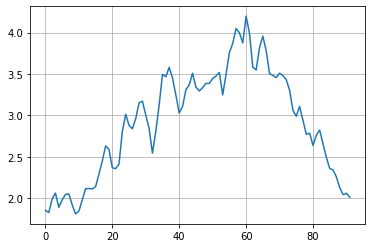

In [126]:
#Durchschnittlicher Niederschlag pro Tag
al=[]
for i in range (0,92):
    alf=[]
    for j in range (0,39):
        alf.append(dat.Alles[i+92*j])
    al.append(np.mean(alf))
plt.plot(al)
plt.grid('--')

In [125]:
#durchschnittlicher SPI pro Cluster
for cl in range (1,10):
    sp=[]
    cnt=0
    for i in range (0,len(dat.SST_Cluster)):
        if dat.wr900_Cluster[i] == cl:
            sp.append(std[i])
            cnt=cnt+1
    print('Cluster',cl,':',np.sum(sp)/cnt)

Cluster 1 : -0.07608908734597182
Cluster 2 : 0.1042740907619057
Cluster 3 : -0.06640523220157529
Cluster 4 : 0.03998054283025654
Cluster 5 : 0.0064812690034969185
Cluster 6 : 0.03592856171891823
Cluster 7 : -0.02841850550272929
Cluster 8 : -0.006405354043618905
Cluster 9 : -0.005607154963418427


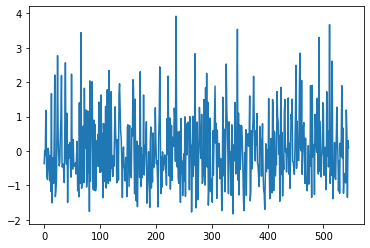

In [123]:
plt.plot(sp)

In [105]:
np.sum(sp)

-14.934886605601243

In [119]:
#Anzahl an positiver/negativer SPI pro Cluster
for cl in range (1,10):
    cnt=0
    count=0
    for i in range (0,len(dat.SST_Cluster)):
        if dat.tp_Cluster[i] == cl:
            if spi[i] > 0:
                count=count+1
            else:
                cnt=cnt+1
    print('Cluster',cl,':','+:',count,'-:',cnt,'+/-:',np.round(count/cnt,3))

Cluster 1 : +: 103 -: 137 +/-: 0.752
Cluster 2 : +: 228 -: 326 +/-: 0.699
Cluster 3 : +: 109 -: 114 +/-: 0.956
Cluster 4 : +: 82 -: 84 +/-: 0.976
Cluster 5 : +: 87 -: 135 +/-: 0.644
Cluster 6 : +: 320 -: 410 +/-: 0.78
Cluster 7 : +: 170 -: 224 +/-: 0.759
Cluster 8 : +: 117 -: 159 +/-: 0.736
Cluster 9 : +: 151 -: 212 +/-: 0.712


In [33]:
#Durchschnittlichen Gradienten der t2m über dem Atlantik berechnen (Für E-ATL und ATL)
afr=0
sda=0
cnt=0
for Jahr in range (1979,2019):
    day=0
    days=365
    if Jahr/4 == int(Jahr/4):
        days=days+1
    atl=xr.open_dataset('/Users/weber-j/Documents/ERA5/daily/ERA5_daily_t2m_'+str(Jahr)+'.nc')
    for Tag in range (day,day+days):
        afr=afr+float(atl.t2m[day,360,0])
        sda=sda+float(atl.t2m[day,360,1340])
        cnt=cnt+1
diff_mean=(afr-sda)/cnt
diff_mean

In [72]:
#Berechnung des Gradienten pro Monat
Monate=[0,31,28,31,30,31,30,31,31,30,31,30,31]
Monate_s=[0,31,29,31,30,31,30,31,31,30,31,30,31]
for Jahr in range (1979,2019):
    if Jahr/4 == int(Jahr/4):
        a=1
    else:
        a=0
    atl=xr.open_dataset('/Users/weber-j/Documents/ERA5/daily/ERA5_daily_t2m_'+str(Jahr)+'.nc')
    Monat=1
    qw=[]
    while Monat <13:
        day_=int(np.sum(Monate[0:Monat]))
        days_=Monate[Monat]
        if a==1:
            day_=int(np.sum(Monate_s[0:Monat]))
            days_=Monate_s[Monat]
        diff=0
        for Tag in range (day_,day_+days_):
            diff=diff+float(atl.t2m[Tag,360,0])-float(atl.t2m[Tag,360,1340])
        #print('Jahr:',Jahr,'Monat:',Monat,'Wert:',diff/days_-diff_mean)
        qw.append(np.round(diff/days-diff_mean,5))
        Monat=Monat+1
    print(Jahr,qw[0],qw[1],qw[2],qw[3],qw[4],qw[5],qw[6],qw[7],qw[8],qw[9],qw[10],qw[11])

0.04929 0.24267 0.43715 0.2319 -0.10658 -1.61548 -1.84163 -2.20782 -1.60723 -1.40957 -0.39393 -0.43118
0.17189 0.11704 0.64949 0.3772 -0.02058 -1.42802 -1.82844 -1.44833 -1.1969 -1.00599 -0.61883 -0.34308
0.16065 0.70834 0.55476 0.48432 0.12113 -1.08194 -1.74749 -2.32408 -1.85877 -0.87157 -0.43333 0.13225
0.50656 0.74002 0.70214 0.74027 -0.31382 -2.28774 -1.73975 -1.76443 -1.72813 -0.93586 -0.42358 0.2412
0.567 0.86434 0.56089 0.11335 0.01297 -1.77185 -2.03057 -2.01152 -1.41886 -0.91219 -0.43996 -0.0593
0.47538 0.70361 0.7993 0.56415 0.04502 0.0184 -0.54796 -1.13346 -0.63353 -0.43314 0.11958 0.01353
0.38747 0.9234 0.84732 0.68229 0.34303 -1.02479 -1.71539 -1.31606 -1.01135 -0.69305 -0.09681 0.07781
0.62855 0.8917 0.90885 0.70945 0.4173 -1.22987 -1.8913 -1.45496 -1.593 -1.49981 -0.38754 -0.32845
-0.03607 0.53679 0.63986 0.49552 -0.00497 -1.10052 -0.92148 -1.67033 -2.03771 -1.10664 -0.4408 -0.18042
0.24933 0.70685 0.54166 0.57492 0.40857 -0.54627 -1.13624 -1.3539 -1.11915 -0.7222 -0.6264

In [80]:
#Durchschnittlichen Gradienten der t2m über dem Atlantik berechnen, Atlantic East
op=[]
Monate=[0,0,31,28,31,30,31,30,31,31,30,31,30,31]
Monate_s=[0,0,31,29,31,30,31,30,31,31,30,31,30,31]
for Monat in range (1,13):
    qw=[]
    for Jahr in range (1979,2019):
        if Jahr/4 == int(Jahr/4):
            a=1
        else:
            a=0
        atl=xr.open_dataset('/Users/weber-j/Documents/ERA5/daily/ERA5_daily_t2m_'+str(Jahr)+'.nc')
        dy=np.sum(Monate[0:Monat])
        dy2=Monate[Monat+1]
        if a==1:
            dy=np.sum(Monate_s[0:Monat])
            dy2=Monate_s[Monat+1]
        for Tag in range (int(dy),int(dy)+dy2):
            qw.append(float(atl.t2m[Tag,360,0]))
            #print(atl.time[Tag])
    print(np.mean(qw))
    op.append(np.mean(qw))

299.43426577660347
299.39496108873755
300.16167595155775
300.5336687215169
300.48726437476375
299.8045179748535
297.9775734439973
296.85290726692443
296.77297040303546
297.43441240864416
298.2202121480306
298.8537709143854


In [83]:
for Jahr in range (1979,2019):
    if Jahr/4 == int(Jahr/4):
        a=1
    else:
        a=0
    atl=xr.open_dataset('/Users/weber-j/Documents/ERA5/daily/ERA5_daily_t2m_'+str(Jahr)+'.nc')
    qw=[]
    for Monat in range (1,13):
        dy=np.sum(Monate[0:Monat])
        dy2=Monate[Monat+1]
        if a==1:
            dy=np.sum(Monate_s[0:Monat])
            dy2=Monate_s[Monat+1]
        qwe=[]
        for Tag in range (int(dy),int(dy)+dy2):
            qwe.append(float(atl.t2m[Tag,360,0]))
        qw.append(np.round(np.mean(qwe)-op[Monat-1],5))
    print(Jahr,qw[0],qw[1],qw[2],qw[3],qw[4],qw[5],qw[6],qw[7],qw[8],qw[9],qw[10],qw[11])

1979 -0.25101 -0.26115 -0.45902 -0.52062 -0.36936 0.01286 -0.3694 -0.15395 -0.3825 -0.23494 -0.61294 -0.00413
1980 -0.28774 -0.27212 -0.7822 -0.61508 -0.15996 -0.34918 -0.60994 -0.47884 -0.30836 -0.07809 -0.49988 -0.48327
1981 -0.68901 -0.6983 -0.36877 -0.46776 -0.31865 -0.16709 0.18072 -0.27029 -0.49204 -0.42076 0.13759 -0.23346
1982 -0.20359 -0.18698 -0.36292 -0.3425 -0.30379 -0.55964 -1.38042 -1.06162 -1.08301 -0.87402 -0.64873 -0.43171
1983 0.15929 0.16039 0.21486 -0.06149 -0.10599 -0.18359 -1.05675 -0.87498 -0.73102 -0.57981 -0.68493 -0.55835
1984 -0.27463 -0.2541 -0.23714 -0.16323 -0.34455 -0.14874 0.82794 0.99614 0.7679 0.67801 0.32606 0.07289
1985 -0.14101 -0.11416 -0.17653 -0.34117 -0.26622 -0.16701 -0.39216 0.27884 0.22173 0.05247 -0.1404 -0.06119
1986 -0.31152 -0.29493 -0.24651 -0.54422 -0.10657 -0.0028 -0.07233 -0.36359 -0.18688 -0.204 -0.76172 -0.46216
1987 -0.37594 -0.36835 -0.1681 -0.15498 0.11367 7e-05 0.70054 1.11837 0.50886 -0.06012 0.17535 0.40538
1988 0.03196 0.0164

Uganda
Mann_Kendall_Test(trend='decreasing', h=True, p=0.0008589391991422612, z=-3.3330680859438147, Tau=-0.3724696356275304, s=-276.0, var_s=6807.333333333333, slope=-0.4782608695652174, intercept=54.08695652173913)


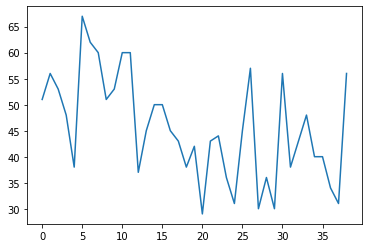

In [260]:
#Starkregenereignisse
ii=0
ii=ii+1   #Hier das gewünschte Land ändern
ui=[]
ba=[]
print(Länder[ii])
for i in range (0,39):
    cnt=0
    ab=[]
    for j in range (0,92):
        tag=i*92+j
        if getattr(dat,Länder[ii])[tag] > 5:
            cnt=cnt+1
            ab.append(getattr(dat,Länder[ii])[tag])
    #print('Jahr:',i+1980,cnt)
    ui.append(cnt)
    if len(ab)>0:
        ba.append(np.max(ab))
    else:
        ba.append(0)
print(mk.original_test(ui))
plt.plot(ui)

Ethiopia
Jahr: 1980 1
Jahr: 1981 0
Jahr: 1982 1
Jahr: 1983 5
Jahr: 1984 0
Jahr: 1985 1
Jahr: 1986 0
Jahr: 1987 1
Jahr: 1988 2
Jahr: 1989 0
Jahr: 1990 0
Jahr: 1991 2
Jahr: 1992 3
Jahr: 1993 0
Jahr: 1994 4
Jahr: 1995 0
Jahr: 1996 0
Jahr: 1997 0
Jahr: 1998 25
Jahr: 1999 0
Jahr: 2000 2
Jahr: 2001 0
Jahr: 2002 4
Jahr: 2003 6
Jahr: 2004 1
Jahr: 2005 11
Jahr: 2006 0
Jahr: 2007 10
Jahr: 2008 1
Jahr: 2009 12
Jahr: 2010 3
Jahr: 2011 9
Jahr: 2012 1
Jahr: 2013 0
Jahr: 2014 0
Jahr: 2015 5
Jahr: 2016 39
Jahr: 2017 26
Jahr: 2018 0
Mann_Kendall_Test(trend='no trend', h=False, p=0.05374679497167967, z=1.9288716752144626, Tau=0.20917678812415655, s=155.0, var_s=6374.333333333333, slope=0.05, intercept=0.04999999999999993)


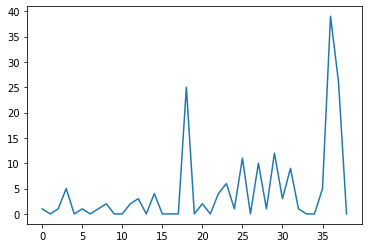

In [237]:
#Hitzetagereignisse

#Temps=[18.51,24.44,25.41,22.64,24.03,18.78,25.83,21.20,26.28,27.41,21.50,26.47] #5%-Perzentil der Länder
#Temps=[18.82,25.17,26.32,23.02,24.38,19.09,26.1,21.51,26.96,28.49,21.80,26.71] #10%-Perzentil
#Temps=[19.34,26.36,27.68,23.71,25.00,19.61,26.70,21.91,28.24,30.06,22.44,27.00] #25%-Perzentil
#Temps=[19.93,28.00,29.55,24.44,25.74,20.24,27.31,22.42,29.77,31.67,23.15,27.31] #50%-Perzentil
#Temps=[20.56,29.86,30.88,25.15,26.75,20.91,27.87,22.98,31.20,32.96,24.04,27.62] #75%-Perzentil
#Temps=[21.18,31.79,31.81,25.76,27.43,21.59,28.40,23.65,32.42,33.94,25.36,27.91] #90%-Perzentil
Temps=[21.51,32.85,32.30,26.11,27.75,21.99,28.66,24.11,32.99,34.44,25.96,28.09] #95%-Perzentil
#ii=0
ii=ii+1
ui=[]
ba=[]
print(Länder[ii])
for i in range (0,39):
    cnt=0
    ab=[]
    for j in range (0,92):
        tag=i*92+j
        if getattr(dat,Länder_t2m[ii])[tag] > Temps[ii]:
            cnt=cnt+1
            ab.append(getattr(dat,Länder_t2m[ii])[tag])
    print('Jahr:',i+1980,cnt)
    ui.append(cnt)
    if len(ab)>0:
        ba.append(np.max(ab))
    else:
        ba.append('nan')
print(mk.original_test(ui))
plt.plot(ui)

Eritrea
Mann_Kendall_Test(trend='no trend', h=False, p=0.2686983140541632, z=1.1060651671828738, Tau=0.12280701754385964, s=91.0, var_s=6621.0, slope=3.422000000000001e-05, intercept=0.028437307)


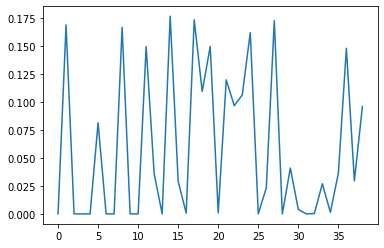

In [60]:
#Wüstentagereignisse (Temp > 90. Perz, tp<0.2)

#Temps=[18.51,24.44,25.41,22.64,24.03,18.78,25.83,21.20,26.28,27.41,21.50] #5%-Perzentil
#Temps=[18.82,25.17,26.32,23.02,24.38,19.09,26.1,21.51,26.96,28.49,21.80] #10%-Perzentil
#Temps=[19.34,26.36,27.68,23.71,25.00,19.61,26.70,21.91,28.24,30.06,22.44] #25%-Perzentil
#Temps=[19.93,28.00,29.55,24.44,25.74,20.24,27.31,22.42,29.77,31.67,23.15] #50%-Perzentil
#Temps=[20.56,29.86,30.88,25.15,26.75,20.91,27.87,22.98,31.20,32.96,24.04] #75%-Perzentil
Temps=[21.18,31.79,31.81,25.76,27.43,21.59,28.40,23.65,32.42,33.94,25.36] #90%-Perzentil
#Temps=[21.51,32.85,32.30,26.11,27.75,21.99,28.66,24.11,32.99,34.44,25.96] #95%-Perzentil
ii=7
ui=[]
ba=[]
for ii in range (2,3):
    print(Länder[ii])
    for i in range (0,39):
        cnt=0
        ab=[]
        for j in range (0,92):
            tag=i*92+j
            if getattr(dat,Länder[ii])[tag] < 0.2 and getattr(dat,Länder_t2m[ii])[tag] > Temps[ii]:
                cnt=cnt+1
                ab.append(getattr(dat,Länder[ii])[tag])
        #print('Jahr:',i+1980,cnt)
        ui.append(cnt)
        if len(ab)>0:
            ba.append(np.max(ab))
        else:
            ba.append(0)
    print(mk.original_test(ba))
    plt.plot(ba)

In [16]:
#Auftrittsdatum Max_tp und Max_t2m auf Trends checken
maxtp=pd.read_csv('/Users/weber-j/Documents/Date_t2mMax.csv',sep=';')
maxtp

,Jahr,Bu_tp,Bu_t2m,Dj_tp,Dj_t2m,Er_tp,Er_t2m,Et_tp,Et_t2m,Ke_tp,...,Ta_tp,Ta_t2m,SS_tp,SS_t2m,Su_tp,Su_t2m,Ug_tp,Ug_t2m,Me_tp,Me_t2m
0,1980,2,18,45,91,5,80,47,17,49,...,43,37,65,18,80,43,70,22,81,69
1,1981,29,0,18,87,17,80,18,0,24,...,29,6,70,1,68,60,18,1,73,59
2,1982,54,26,30,91,30,80,30,26,31,...,32,25,88,26,66,63,54,26,82,53
3,1983,0,22,79,74,12,75,82,29,53,...,15,9,82,29,68,60,82,0,55,74
4,1984,33,10,85,84,70,64,77,39,41,...,42,10,54,11,79,60,54,10,11,39
5,1985,62,16,65,86,58,86,42,16,28,...,28,16,23,16,85,16,43,16,42,39
6,1986,51,49,57,88,41,64,33,26,5,...,39,3,64,46,48,63,37,26,57,50
7,1987,38,5,80,57,36,56,36,65,37,...,17,4,75,23,79,67,36,23,65,56
8,1988,4,0,56,81,48,91,53,1,48,...,19,2,66,2,78,90,67,2,17,56
9,1989,42,0,38,91,37,91,38,5,38,...,35,2,26,2,80,62,21,0,70,54


In [41]:
mk.original_test(maxtp.Me_tp)

Mann_Kendall_Test(trend='no trend', h=False, p=0.6984583366953483, z=0.3874023873216025, Tau=0.044534412955465584, s=33.0, var_s=6823.0, slope=0.08823529411764706, intercept=57.3235294117647)

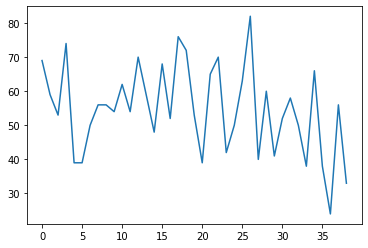

In [42]:
plt.plot(maxtp.Me_t2m)

In [173]:
import pymannkendall as mk
mk.original_test(ba)

Mann_Kendall_Test(trend='no trend', h=False, p=0.2762780286051476, z=-1.0887185282498184, Tau=-0.12280701754385964, s=-91.0, var_s=6833.666666666667, slope=-0.017396493619047604, intercept=7.500459642761904)

In [229]:
#Berechnung des Niederschlagstrends der einzelnen Cluster
for cl in range (1,12):
    da=[]
    print('Cluster:',cl)
    for land in range(12,13):
        for i in range (0,3588):
            if dat.tp_Cluster[i]==cl:
                da.append(getattr(dat,Länder[land])[i])
        print(mk.original_test(da))
#plt.plot(da)

Cluster: 1
Mann_Kendall_Test(trend='no trend', h=False, p=0.7276177641966322, z=-0.3482961775870421, Tau=-0.015132496513249652, s=-434.0, var_s=1545533.3333333333, slope=-0.00033369742217295023, intercept=3.7257193609496673)
Cluster: 2
Mann_Kendall_Test(trend='no trend', h=False, p=0.05540013865989901, z=-1.9157247635084484, Tau=-0.05443886643904923, s=-8339.0, var_s=18943383.666666668, slope=-0.00035954656932153304, intercept=2.1718371709174042)
Cluster: 3
Mann_Kendall_Test(trend='decreasing', h=True, p=0.01667700725417265, z=-2.3937522963790463, Tau=-0.1077445158162647, s=-2667.0, var_s=1240400.3333333333, slope=-0.0023396780285714364, intercept=3.5496914851714294)
Cluster: 4
Mann_Kendall_Test(trend='no trend', h=False, p=0.21392672506224875, z=-1.242840201293955, Tau=-0.06506024096385542, s=-891.0, var_s=512801.6666666667, slope=-0.0027439172417582404, intercept=5.750420366945054)
Cluster: 5
Mann_Kendall_Test(trend='no trend', h=False, p=0.1569006134602744, z=-1.4155728213687513, Ta

In [184]:
#Prüfung, ob die stärkste Phase der Niederschläge pro Land schwächer wird
for land in range (0,13):
    print('Land:',Länder[land])
    das=[]
    for yr in range (0,39):
        da=[]
        for day in range (0+92*yr,86+92*yr):
            da.append(getattr(dat,Länder[land])[day]+getattr(dat,Länder[land])[day+1]+getattr(dat,Länder[land])[day+2]+
                      getattr(dat,Länder[land])[day+3]+getattr(dat,Länder[land])[day+4]+getattr(dat,Länder[land])[day+5]+
                      getattr(dat,Länder[land])[day+6])
        das.append(np.max(da))
    print(mk.original_test(das))

Land: Burundi
Mann_Kendall_Test(trend='no trend', h=False, p=0.5778990721352786, z=-0.5564561366610183, Tau=-0.06342780026990553, s=-47.0, var_s=6833.666666666667, slope=-0.1078290465909097, intercept=73.01710991222728)
Land: Dschibuti
Mann_Kendall_Test(trend='no trend', h=False, p=0.10502173077524635, z=-1.6209809198386187, Tau=-0.18218623481781376, s=-135.0, var_s=6833.666666666667, slope=-0.2663851631666664, intercept=28.069218288166663)
Land: Eritrea
Mann_Kendall_Test(trend='decreasing', h=True, p=0.015547224241134305, z=-2.4193745072218187, Tau=-0.27125506072874495, s=-201.0, var_s=6833.666666666667, slope=-0.5455006507999999, intercept=33.1456484632)
Land: Ethiopia
Mann_Kendall_Test(trend='no trend', h=False, p=0.4107427047210992, z=-0.8225873324554184, Tau=-0.0931174089068826, s=-69.0, var_s=6833.666666666667, slope=-0.10436879677777829, intercept=49.68091434877778)
Land: Kenia
Mann_Kendall_Test(trend='no trend', h=False, p=0.3453965562420982, z=-0.9435560578165093, Tau=-0.10661

In [269]:
#Durchschnittliche Temperatur der Cluster pro Land
for land in range (0,13):
    print('Land:',Länder[land])
    for cl in range (1,10):
        var=0
        count=0
        for tag in range (0,len(dat.Burundi)):
            if dat.wr900_Cluster[tag] == cl:
                var=var+float(getattr(dat,Länder_t2m[land])[tag])
                count=count+1
        print(var/count)
print('finisher')

Land: Burundi
19.601394736842114
20.42631436314363
19.912770780856413
19.960499999999985
20.437434944237907
20.02080586080586
19.888388625592405
19.894560439560436
19.70334183673471
Land: Dschibuti
29.089052631578973
26.327235772357714
26.325617128463513
27.170619047619038
25.45516728624535
31.54335164835166
29.948988941548166
25.68318681318683
27.8151020408163
Land: Eritrea
30.221236842105228
27.704444444444427
27.980579345088174
28.59166666666664
27.11416356877324
30.996611721611703
30.775244865718786
26.967032967032964
29.274336734693833
Land: Ethiopia
24.013526315789473
24.916856368563664
24.70856423173805
24.577404761904745
24.76197026022305
23.976227106227128
24.290300157977885
24.44467032967032
24.48900510204082
Land: Kenia
25.103605263157906
26.764092140921406
26.383526448362726
26.26852380952381
26.82676579925648
25.09399267399266
25.347535545023675
26.474670329670328
25.656683673469402
Land: Ruanda
19.915131578947374
20.808617886178876
20.296926952141053
20.294380952380948
20

In [129]:
#Durchschnittstemperatur pro Cluster
for cl in range (0,13):
    fa=[]
    for i in range (0,3588):
        if dat.tp_Cluster[i]==10:
            fa.append(getattr(dat,Länder_t2m[cl])[i])
    print(np.mean(fa))

19.673966480446925
29.864357541899444
30.79614525139665
24.022458100558662
24.95441340782123
19.925754189944133
26.988659217877096
21.955083798882683
28.471731843575423
31.993128491620116
22.517150837988826
27.3227374301676
28.075586592178773


In [140]:
#Vorkommen des Clusters tp-6 pro Monat
for mon in range (0,3):
    print('Monat:',mon)
    if mon==0:
        days_anf=0
        days_end=31
    elif mon == 1:
        days_anf=31
        days_end=61
    elif mon == 2:
        days_anf=61
        days_end=92
    for yr in range (0,39):
        cnt=0
        for days in range (days_anf+92*yr,days_end+92*yr):
            if dat.tp_Cluster[days]==6:
                cnt=cnt+1
        print(cnt)

Monat: 0
9
9
10
13
11
14
5
14
9
9
3
11
16
17
8
8
9
13
14
4
11
10
3
15
18
11
7
18
9
16
5
13
20
4
10
14
19
10
8
Monat: 1
3
2
3
4
4
0
1
7
4
6
2
1
3
9
6
5
6
1
3
10
8
10
5
6
1
8
1
11
8
5
6
8
2
1
6
0
2
11
0
Monat: 2
0
4
2
0
0
0
1
0
6
3
5
0
4
0
0
3
0
6
4
2
11
3
12
4
14
0
1
8
1
11
2
0
2
8
1
1
4
1
0


In [204]:
gdf=xr.open_dataset('/Users/weber-j/Documents/wr900_all.nc')

In [195]:
gdf.u[0]

<xarray.DataArray 'u' (level: 1, latitude: 100, longitude: 89)>
array([[[-1.827191, -1.642161, ..., -6.827115, -6.977607],
        [-1.855152, -1.747423, ..., -7.149479, -7.290102],
        ...,
        [-1.589531, -1.632293, ..., -4.434882, -4.716128],
        [-1.308285, -1.272924, ..., -4.730108, -4.907737]]], dtype=float32)
Coordinates:
    time       datetime64[ns] 1979-01-01T12:00:00
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 51.5 51.75 52.0
  * latitude   (latitude) float32 14.25 14.0 13.75 13.5 ... -10.0 -10.25 -10.5
  * level      (level) float64 900.0
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1

In [200]:
#Schwankung des v-Wind berechnen
start=time.time()
gh=abs(gdf.v[0,0]-gdf.v[1,0])
for i in range (1,len(gdf.v)-1):
    gh=gh+(abs(gdf.v[i,0]-gdf.v[i+1,0]))
    if i == 1000 or i == 2000 or i == 10000:
        end=time.time()
        print(end-start)
gh=gh/len(gdf.v)

3.1064319610595703
6.087692975997925
26.86474895477295


In [191]:
gh

<xarray.DataArray 'u' (latitude: 100, longitude: 89)>
array([[57.86891 , 64.68665 , 64.4857  , ..., 27.245703, 26.658274,
        26.519659],
       [56.60589 , 61.049652, 59.834957, ..., 25.688026, 25.581985,
        25.497013],
       [52.519573, 57.069893, 57.1482  , ..., 24.952011, 24.852186,
        24.934658],
       ...,
       [45.375916, 41.917805, 39.87056 , ..., 23.720886, 23.900715,
        24.178724],
       [42.64781 , 40.387157, 38.055466, ..., 23.051098, 23.409454,
        23.824812],
       [40.421482, 41.446182, 39.02817 , ..., 22.605581, 23.08084 ,
        23.619875]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 51.5 51.75 52.0
  * latitude   (latitude) float32 14.25 14.0 13.75 13.5 ... -10.0 -10.25 -10.5
    level      float64 750.0

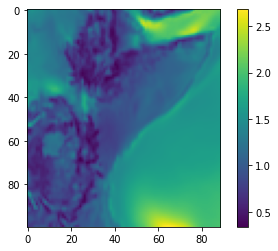

In [197]:
plt.imshow(gh)
plt.colorbar()

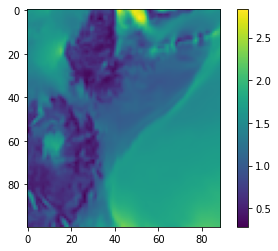

In [201]:
plt.imshow(gh)
plt.colorbar()

In [205]:
gdf.u[0,0,20,30]

<xarray.DataArray 'u' ()>
array(63.267067, dtype=float32)
Coordinates:
    time       datetime64[ns] 1979-01-01T12:00:00
    longitude  float32 37.5
    latitude   float32 9.25
    level      float64 750.0
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1

In [228]:
#Analyse eines einzelnen Punktes
cnt=0
for mon in range (0,3):
    if mon == 0:
        mo=0
        month=31
    elif mon == 1:
        mo=31
        month=61
    elif mon== 2:
        mo=61
        month=92
    gd=gdf.u[mo+59,0,80,60]
    for Jahr in range (0,39): #(0,40)
        t=Jahr*365+59
        sch=int((Jahr)/4)   #Schaltjahr
        anfang=t+sch+mo
        ende=anfang+month-mo
        for k in range (anfang+1,ende):
            gd=gd+gdf.u[k,0,80,60]
            cnt=cnt+1
    print(float(gd)/((month-mo)*39))

140.4810794044665
139.62926014957264
135.25867193961952


In [212]:
gdf.u[mo+59,0,20,30]

<xarray.DataArray 'u' ()>
array(85.49537, dtype=float32)
Coordinates:
    time       datetime64[ns] 1979-05-01T12:00:00
    longitude  float32 37.5
    latitude   float32 9.25
    level      float64 750.0
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1

In [283]:
#Vorkommen von tp-6 in der Hauptphase der Regenzeit
am=[]
for i in range (0,39):
    la=0
    for j in range (31,70):
        if dat.tp_Cluster[i*39+j] == 6:
            la=la+1
    print(la)
    am.append(la)

3
9
1
6
12
2
12
5
4
10
1
14
0
4
3
4
14
3
13
0
15
6
3
3
7
11
1
10
9
7
23
0
8
6
1
12
4
10
4


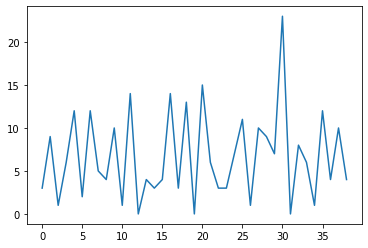

In [284]:
plt.plot(am)